**If you like my notebook, please don't forget to UPVOTE! You can also make a copy of my notebook and edit to run your additional analysis.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-cafe-reviews/reviews.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('/kaggle/input/zomato-cafe-reviews/reviews.csv')
data.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [4]:
data['Overall_Rating'].unique()

array(['3.9', '3', '3.8', '4.3', '3.7', '4.8', '4.1', '4', '4.2', '3.6',
       '4.4', '-', '3.5', '3.4', '3.1', '3.3', '3.2', '4.5', '4.9', 'New',
       '2.8', '2.7', '2.5', '2.9', '2.6'], dtype=object)

In [5]:
data = data[data['Overall_Rating']!='-']

In [6]:
data = data[data['Overall_Rating']!='New']

In [7]:
data.shape

(658, 7)

Plotting overall ratings:

In [8]:
fig = px.histogram(data, x="Overall_Rating")
fig.update_layout(title_text='Overall_Rating')
fig.show()

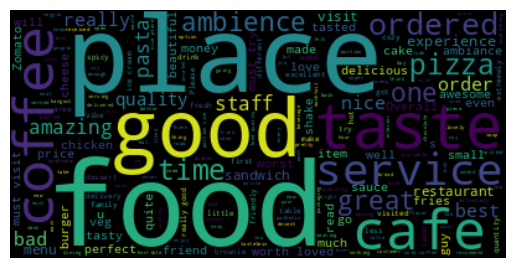

In [9]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in data.Review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()